# Superstore Exploratory Data Analysis - Example Solutions

Over the course of the next **60 minutes**, you will apply the exploratory data analysis techniques from the previous session to a new dataset.
This is an open ended exercise and is meant to allow everyone some time to learn from one another, apply what you've learned so far and have some **FUN** along the way!

## ***Practicum Assignment***


- Arrange into groups of no larger than five.
- Spend about **50 Minutes** on determining which questions you would like to answer and carrying out some EDA on the provided dataset.
- Spend the last **5-10 Minutes** on wrapping things up and compiling the learnings you would like to present.
- We will spend the final **15 minutes** allowing each team a 3 minute informal presentation speaking to what they discovered during their analysis.**

*Focus on EDA and not building models. We will dive into that over the course of the next few days.*

### Business Context
__Superstore__, a major North American office supply store, wants to apply analytics to its sales data to understand their current state, identify areas for efficiency gains, and boost profits. With Superstore's sales data in hand, can you help answer some of the following questions?

* How have Superstore's sales been over time/past year/past month? 
* Are there product groups which are over/under performing their peers? 
* Are complementry goods being effectively utilized?
* Could any adjustments to discount rates be made to potential cause improved profits?
* Which City/Section/SubCategory has the best profit margin?
* Which product category/sub-category is performing the best/worst?
* Feel free to come up with your own question that you find interesting?

### Data Context

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from datetime import datetime
%matplotlib inline

In [2]:
st = pd.read_csv("../data/superstore.csv", encoding="latin1")

In [3]:
st.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Section,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,7981,CA-2011-103800,1/3/2013,1/7/2013,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,...,77095,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2,0.2,5.5512
1,740,CA-2011-112326,1/4/2013,1/8/2013,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540,Central,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784,3,0.2,4.2717


In [4]:
st.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'Project',
       'Postal Code', 'Section', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [5]:
st['Category'].unique()

array(['Office Supplies', 'Furniture', 'Technology'], dtype=object)

In [6]:
st['Sub-Category'].unique()

array(['Paper', 'Labels', 'Storage', 'Binders', 'Art', 'Chairs', 'Phones',
       'Fasteners', 'Furnishings', 'Accessories', 'Envelopes',
       'Bookcases', 'Appliances', 'Tables', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

In [7]:
st['Segment'].unique()

array(['Consumer', 'Home Office', 'Corporate'], dtype=object)

### Region Performance

In [8]:
region_profit = st[['Section','Sales','Profit']].groupby(by='Section').sum()

In [9]:
region_profit.sort_values(by=['Profit'], inplace=True)

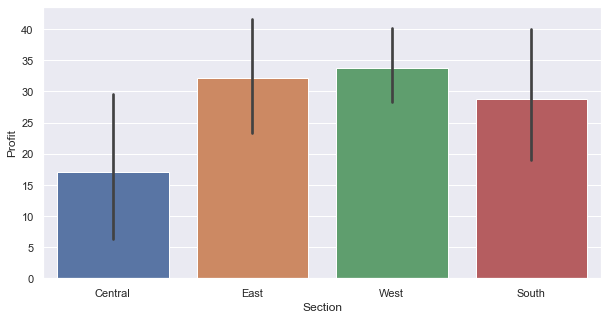

In [10]:
plt.figure(figsize=(10, 5))
sns.barplot(x='Section',y='Profit',data=st)

In [11]:
# plt.figure(figsize=(25, 100))
# sns.boxplot(x="Section", y="Profit", data=st, palette='rainbow')

### Time Series: 2016 Profit Performance

In [12]:
st.sort_values(by=['Order Date'], ascending=False).head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Section,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
8447,1218,US-2014-118087,9/9/2016,9/13/2016,Standard Class,SP-20620,Stefania Perrino,Corporate,United States,Philadelphia,...,19134,East,FUR-FU-10001867,Furniture,Furnishings,Eldon Expressions Punched Metal & Wood Desk Ac...,17.024,2,0.2,1.7024
8462,6256,CA-2014-139444,9/9/2016,9/15/2016,Standard Class,GK-14620,Grace Kelly,Corporate,United States,Plano,...,75023,Central,OFF-LA-10000134,Office Supplies,Labels,Avery 511,9.856,4,0.2,3.4496
8442,1213,US-2014-118087,9/9/2016,9/13/2016,Standard Class,SP-20620,Stefania Perrino,Corporate,United States,Philadelphia,...,19134,East,FUR-CH-10004860,Furniture,Chairs,Global Low Back Tilter Chair,141.372,2,0.3,-48.4704
8443,1214,US-2014-118087,9/9/2016,9/13/2016,Standard Class,SP-20620,Stefania Perrino,Corporate,United States,Philadelphia,...,19134,East,OFF-BI-10002432,Office Supplies,Binders,Wilson Jones Standard D-Ring Binders,3.036,2,0.7,-2.3276
8444,1215,US-2014-118087,9/9/2016,9/13/2016,Standard Class,SP-20620,Stefania Perrino,Corporate,United States,Philadelphia,...,19134,East,OFF-BI-10000069,Office Supplies,Binders,"GBC Prepunched Paper, 19-Hole, for Binding Sys...",4.503,1,0.7,-3.6024


In [13]:
tsplot = st[['Sales','Profit','Order Date']]

In [14]:
tsplot = tsplot.rename(columns={'Order Date':'Order_Date'})

In [15]:
tsplot.head()

,Sales,Profit,Order_Date
0,16.448,5.5512,1/3/2013
1,11.784,4.2717,1/4/2013
2,272.736,-64.7748,1/4/2013
3,3.540,-5.4870,1/4/2013
4,19.536,4.8840,1/5/2013


In [16]:
tsplot['Order_Date'] = pd.to_datetime(tsplot['Order_Date'], format='%m/%d/%Y')

In [17]:
sorted_tsplot = tsplot.sort_values(by='Order_Date', ascending=False)

In [18]:
sorted_2016 = sorted_tsplot[sorted_tsplot['Order_Date'] > '2016-01-01']

//anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


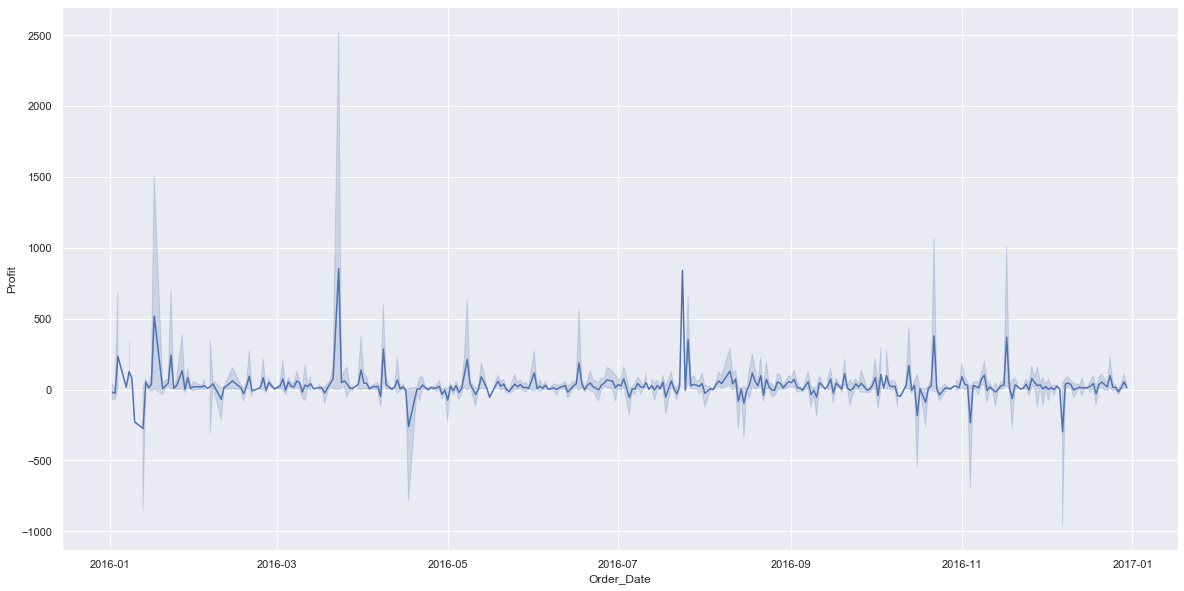

In [19]:
plt.figure(figsize=(20,10))
sns.lineplot(x="Order_Date", y="Profit", data=sorted_2016)

In [20]:
sorted_2016_last_half = sorted_tsplot[sorted_tsplot['Order_Date'] > '2016-06-01']

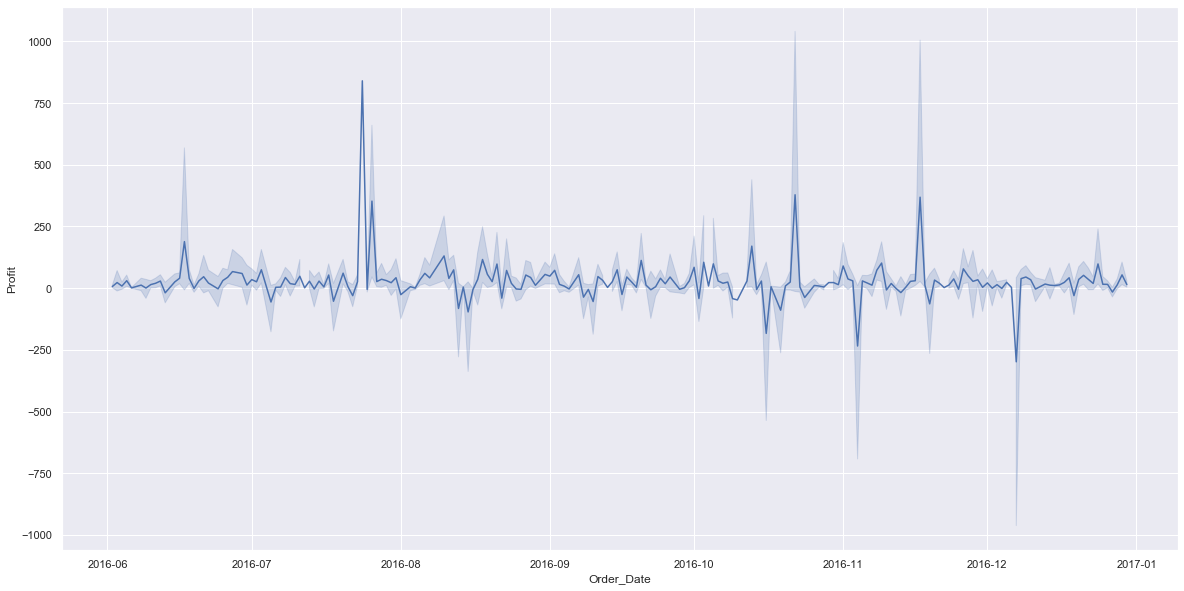

In [21]:
plt.figure(figsize=(20,10))
sns.lineplot(x="Order_Date", y="Profit", data=sorted_2016_last_half)

## Product Category Performance

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

sns.set(style="dark", context="notebook", 
        font_scale=1.5, rc={"lines.linewidth": 2.5})

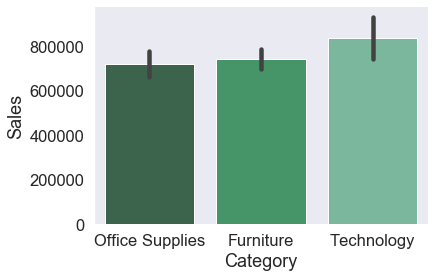

In [23]:
from numpy import sum
fig = plt.figure(1)
sns.barplot(st['Category'], st['Sales'], palette="BuGn_d", estimator=sum)
sns.despine(bottom=True)
plt.show()

## Product Sub-Category Performance

In [24]:
st.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Section,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,7981,CA-2011-103800,1/3/2013,1/7/2013,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,...,77095,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2,0.2,5.5512
1,740,CA-2011-112326,1/4/2013,1/8/2013,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540,Central,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784,3,0.2,4.2717
2,741,CA-2011-112326,1/4/2013,1/8/2013,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736,3,0.2,-64.7748
3,742,CA-2011-112326,1/4/2013,1/8/2013,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540,Central,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540,2,0.8,-5.4870
4,1760,CA-2011-141817,1/5/2013,1/12/2013,Standard Class,MB-18085,Mick Brown,Consumer,United States,Philadelphia,...,19143,East,OFF-AR-10003478,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536,3,0.2,4.8840


In [25]:
ave_discount = st[['Sub-Category','Discount']].groupby(by='Sub-Category').mean()
ave_discount

,Discount
Sub-Category,
Accessories,0.078452
Appliances,0.166524
Art,0.074874
Binders,0.372292
Bookcases,0.211140
Chairs,0.170178
Copiers,0.161765
Envelopes,0.080315
Fasteners,0.082028


In [26]:
sales_profit_category = st[['Sub-Category','Sales','Profit']].groupby(by='Sub-Category').sum()
sales_profit_category

,Sales,Profit
Sub-Category,,
Accessories,167380.3180,41936.6357
Appliances,107532.1610,18138.0054
Art,27118.7920,6527.7870
Binders,203412.7330,30221.7633
Bookcases,114879.9963,-3472.5560
Chairs,328449.1030,26590.1663
Copiers,149528.0300,55617.8249
Envelopes,16476.4020,6964.1767
Fasteners,3024.2800,949.5182


In [27]:
joined_category = pd.DataFrame.join(sales_profit_category,other=ave_discount,on='Sub-Category', how='left')
joined_category.dtypes

Sales       float64
Profit      float64
Discount    float64
dtype: object

In [28]:
# Profit Margin   = Net Profits (or Income) / Net Sales (or Revenue)
joined_category['p_margin'] = ((joined_category['Profit']/joined_category['Sales']))

In [29]:
joined_category

,Sales,Profit,Discount,p_margin
Sub-Category,,,,
Accessories,167380.3180,41936.6357,0.078452,0.250547
Appliances,107532.1610,18138.0054,0.166524,0.168675
Art,27118.7920,6527.7870,0.074874,0.240711
Binders,203412.7330,30221.7633,0.372292,0.148574
Bookcases,114879.9963,-3472.5560,0.211140,-0.030228
Chairs,328449.1030,26590.1663,0.170178,0.080957
Copiers,149528.0300,55617.8249,0.161765,0.371956
Envelopes,16476.4020,6964.1767,0.080315,0.422676
Fasteners,3024.2800,949.5182,0.082028,0.313965


In [30]:
joined_category.sort_values(by='p_margin', ascending=False)

,Sales,Profit,Discount,p_margin
Sub-Category,,,,
Labels,12486.3120,5546.2540,0.068681,0.444187
Paper,78479.2060,34053.5693,0.074891,0.433918
Envelopes,16476.4020,6964.1767,0.080315,0.422676
Copiers,149528.0300,55617.8249,0.161765,0.371956
Fasteners,3024.2800,949.5182,0.082028,0.313965
Accessories,167380.3180,41936.6357,0.078452,0.250547
Art,27118.7920,6527.7870,0.074874,0.240711
Appliances,107532.1610,18138.0054,0.166524,0.168675
Binders,203412.7330,30221.7633,0.372292,0.148574


In [31]:
joined_category.sort_values(by='p_margin', ascending=False, inplace=True)

In [32]:
joined_category.reset_index(inplace=True, drop=False)

In [33]:
joined_category

,Sub-Category,Sales,Profit,Discount,p_margin
0,Labels,12486.3120,5546.2540,0.068681,0.444187
1,Paper,78479.2060,34053.5693,0.074891,0.433918
2,Envelopes,16476.4020,6964.1767,0.080315,0.422676
3,Copiers,149528.0300,55617.8249,0.161765,0.371956
4,Fasteners,3024.2800,949.5182,0.082028,0.313965
5,Accessories,167380.3180,41936.6357,0.078452,0.250547
6,Art,27118.7920,6527.7870,0.074874,0.240711
7,Appliances,107532.1610,18138.0054,0.166524,0.168675
8,Binders,203412.7330,30221.7633,0.372292,0.148574
9,Furnishings,91705.1640,13059.1436,0.138349,0.142404


[Text(0, 0, 'Labels'),
 Text(0, 0, 'Paper'),
 Text(0, 0, 'Envelopes'),
 Text(0, 0, 'Copiers'),
 Text(0, 0, 'Fasteners'),
 Text(0, 0, 'Accessories'),
 Text(0, 0, 'Art'),
 Text(0, 0, 'Appliances'),
 Text(0, 0, 'Binders'),
 Text(0, 0, 'Furnishings'),
 Text(0, 0, 'Phones'),
 Text(0, 0, 'Storage'),
 Text(0, 0, 'Chairs'),
 Text(0, 0, 'Machines'),
 Text(0, 0, 'Supplies'),
 Text(0, 0, 'Bookcases'),
 Text(0, 0, 'Tables')]

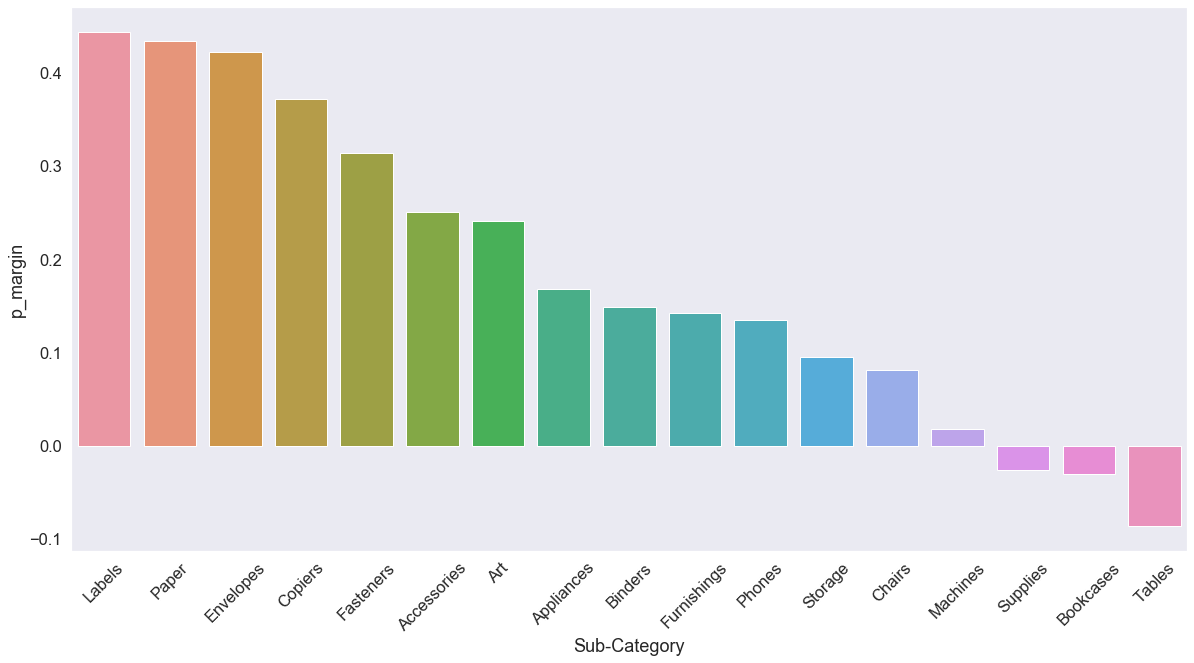

In [34]:
plt.figure(figsize=(20, 10))
g = sns.barplot(x='Sub-Category',y='p_margin',data=joined_category)
g.set_xticklabels(joined_category['Sub-Category'], rotation=45)

## Discount vs Profit Margin Relationship

In [35]:
st.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Section,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,7981,CA-2011-103800,1/3/2013,1/7/2013,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,...,77095,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2,0.2,5.5512
1,740,CA-2011-112326,1/4/2013,1/8/2013,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540,Central,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784,3,0.2,4.2717
2,741,CA-2011-112326,1/4/2013,1/8/2013,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736,3,0.2,-64.7748
3,742,CA-2011-112326,1/4/2013,1/8/2013,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540,Central,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540,2,0.8,-5.4870
4,1760,CA-2011-141817,1/5/2013,1/12/2013,Standard Class,MB-18085,Mick Brown,Consumer,United States,Philadelphia,...,19143,East,OFF-AR-10003478,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536,3,0.2,4.8840


In [36]:
rela_dvp = st[['Discount','Sales','Profit']]

In [37]:
rela_dvp.head()

,Discount,Sales,Profit
0,0.2,16.448,5.5512
1,0.2,11.784,4.2717
2,0.2,272.736,-64.7748
3,0.8,3.540,-5.4870
4,0.2,19.536,4.8840


In [38]:
rela_dvp['p_margin'] = rela_dvp['Profit']/rela_dvp['Sales']

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [39]:
rela_dvp.head()

,Discount,Sales,Profit,p_margin
0,0.2,16.448,5.5512,0.3375
1,0.2,11.784,4.2717,0.3625
2,0.2,272.736,-64.7748,-0.2375
3,0.8,3.540,-5.4870,-1.5500
4,0.2,19.536,4.8840,0.2500


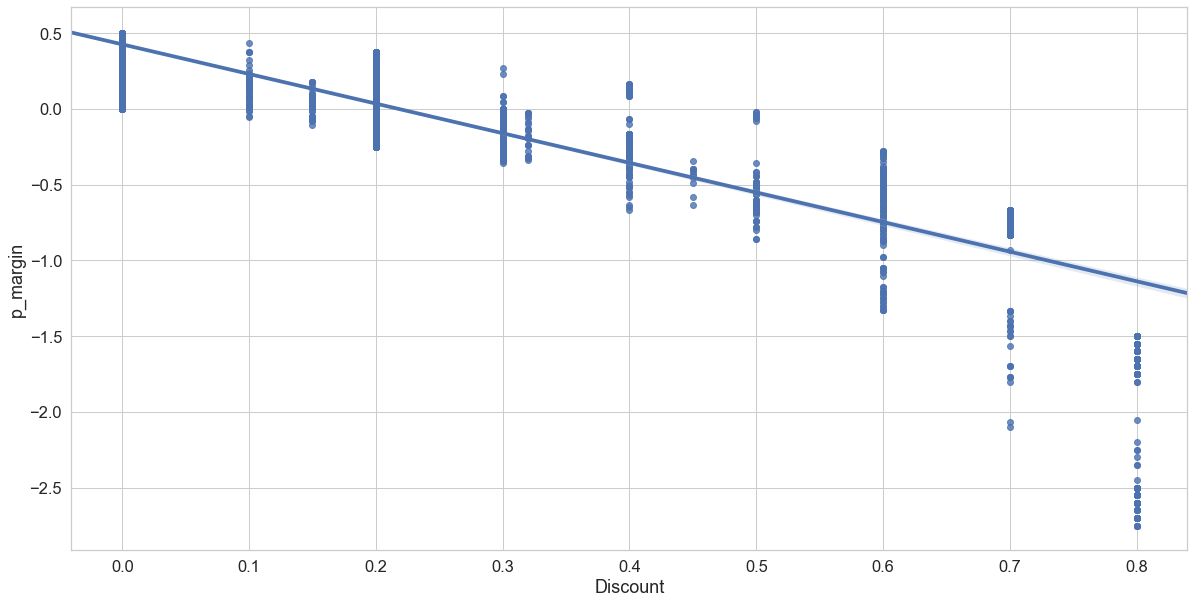

In [40]:
plt.figure(figsize=(20, 10))
sns.set_style('whitegrid')
sns.regplot('Discount','p_margin',data=rela_dvp)